# Dimensionality reduction

Let's check what could be the issue with larger datasets. We know that if we map something in the range of 20 to 30 features to single qubits, that may require huge computing capacity to run.

In [1]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(as_frame=True)
X = dataset.data
Y = dataset.target
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


A simple thing we could do is perform com Principal Component Analysis that characterizes the covariance of the feature space and reduces it to linear combinations of decreasing order of relevance. That way we can safely remove part of the information form our dataset.

In [2]:
from sklearn.decomposition import PCA

# Reduced to the three most significant components
pca = PCA(n_components=3) 
pca.fit(X)

pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

The dataset has not been normalized so the scale of the linear combination if affected by the values of the original dataset.

In [3]:
X_reduced = pca.transform(X)
X_reduced[0]

array([1160.1425737 , -293.91754364,   48.57839763])

Text(0.5, 0, 'PCA 3rd')

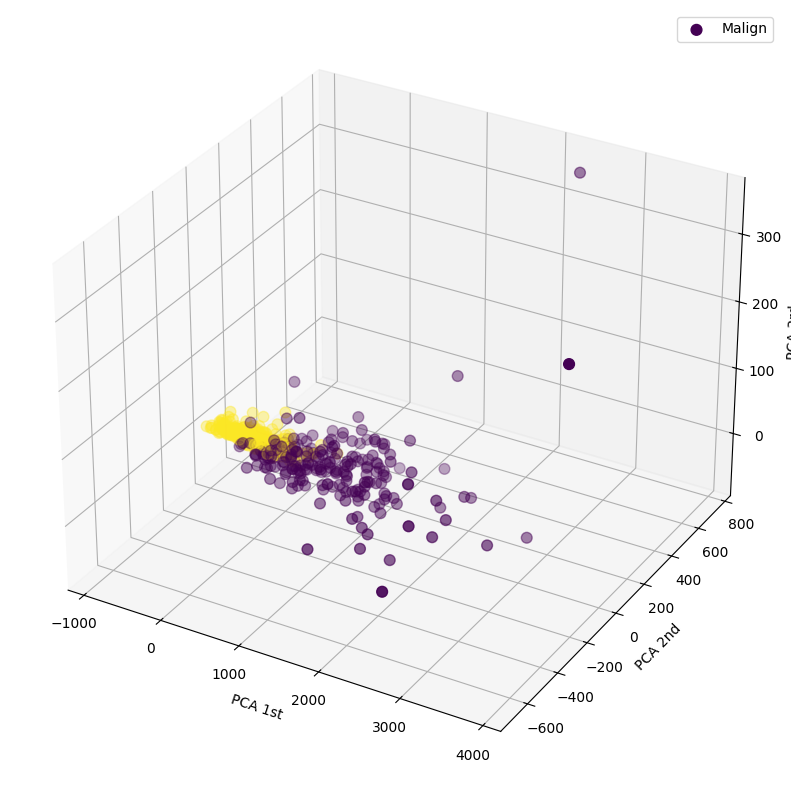

In [4]:
import matplotlib.pylab as plt

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=Y, s=60)
ax.legend(['Malign'])
ax.set_xlabel('PCA 1st')
ax.set_ylabel('PCA 2nd')
ax.set_zlabel('PCA 3rd')

A different option, quite popular and effective is the t-distributed stochastic neighbor embedding (t-SNE). It tries to map a high dimensional distribution to a lower dimensional one where near-by samples in the original space are pushed together while further samples are pushed even further. This is done by computing the mapping between what it is supposed to be a Gaussian distribution and a t-Student distribution by reducing the Kullback Leibler (KL) divergence metric.

The fitting of the new space is done using some gradient based optimization method and the perplexity tries to provide a guess on the deviation (number of neighboring samples).

Text(0.5, 0, '3rd axis')

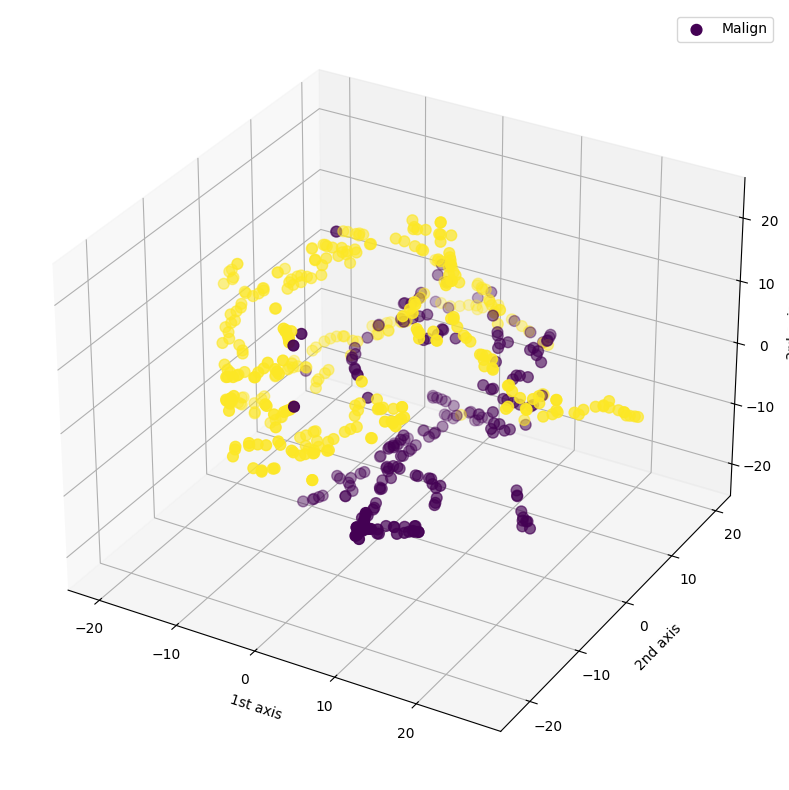

In [7]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=3, learning_rate="auto", init="random", perplexity=4).fit_transform(X)

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=Y, s=60)
ax.legend(['Malign'])
ax.set_xlabel('1st axis')
ax.set_ylabel('2nd axis')
ax.set_zlabel('3rd axis')

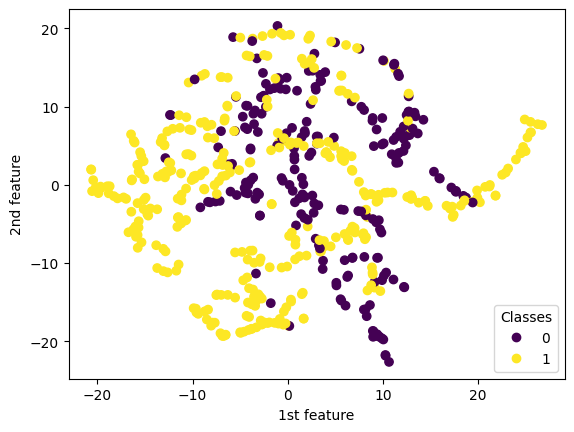

In [8]:
_, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
ax.set(xlabel="1st feature", ylabel="2nd feature")
_ = ax.legend(
    scatter.legend_elements()[0], ["0", "1"], loc="lower right", title="Classes"
)

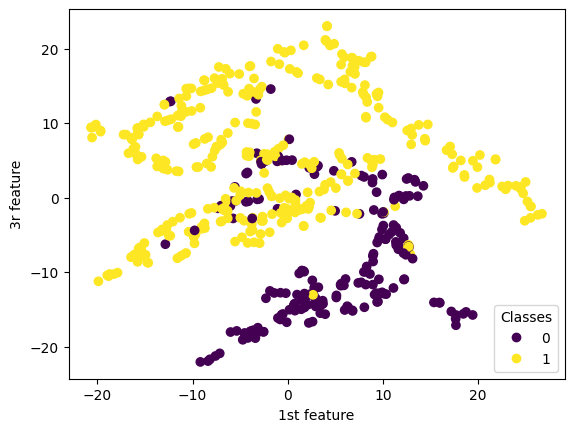

In [9]:
_, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 2], c=Y)
ax.set(xlabel="1st feature", ylabel="3r feature")
_ = ax.legend(
    scatter.legend_elements()[0], ["0", "1"], loc="lower right", title="Classes"
)

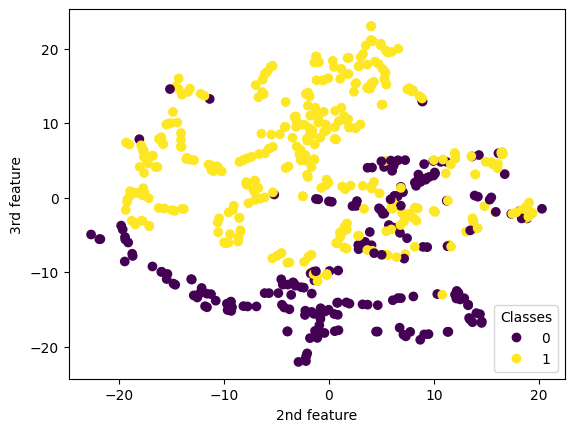

In [10]:
_, ax = plt.subplots()
scatter = ax.scatter(X_tsne[:, 1], X_tsne[:, 2], c=Y)
ax.set(xlabel="2nd feature", ylabel="3rd feature")
_ = ax.legend(
    scatter.legend_elements()[0], ["0", "1"], loc="lower right", title="Classes"
)

A beautiful explanation of this method on the MNIST dataset can be found [here](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)